copyright 2022: *Grzegorz Gwardys, Warsaw University of Technology*<br>
(Jupyter notebook addressed to students of: GSN)


# Changelog 

## v.2

- dodana sekcja Softmax
- dodana sekcja "Materiały pomocniczo-uzupełniające

## v.3

- poprawka w wyznaczeniu pochodnej błędu MSE (niepotrzebny kwardrat na końcu, zamiana y-ków miejscami)
- dopisek o Softmax (komórka teksotwa przed pytaniem w sekcji Softmax)
- w tekście była mowa o klasie `SoftmaxLayer`, chodzi oczywiście o klasę `Softmax`
- w "komórce kodowej" klasa `Softmax` nie dziedziczyła po klasie `Layer`
- drobne poprawki językowe (literówki) 

## v.4

- w sekcji "Warstwa gęsta" został poprawiony indeks (w układzie równań $y$) $y_i \rightarrow y_j$ 
- dodanie "konstruktora" do klasy `Softmax`, zawierającego inicjalizacje `input_size`, będącego potrzebnym do implementacji metody `backward`



# O notatniku

Notatnik zakłada odbycie pierwszych wykładów z przedmiotu GSN, czyli obycia z takimi terminami jak warstwa gęsta, funkcja kosztu, czy algorytm wstecznej propagacji błędu. Z drugiej strony jest on zamkniętą całością tzn. wszystkie wspomniane pojęcia są w nim wyjaśniane. Niemniej, nie należy tego notatnika traktować jako substytut wykładu, jest on materiałem komplementarnym, powtarzającym (może w innej formie) wprowadzone na wykładzie pojęcia. Jest to też zgodne z sentencją repetitio est mater studiorum (powtarzanie jest matką wiedzy).

Cała implementacja jest zrealizowana w `numpy`, aby "nie ukryć" szczegółów, które dydaktycznie są bardzo wartościowe. W notatniku są też ćwiczenia, konieczne do wykonania zadania na końcu - świadomego wykorzystania fragmentów kodu i przeprowadzenia treningu sieci. 



# Warstwa gęsta

Współczesne sieci neuronowe składają się z wielu różnych typów warstw, ale za wyjściową do rozważań należy potraktować warstwę gęstą (ang. Dense Layer), od "której się zaczęło". Warstwa gęsta to nic innego jak pełne połączenie między wszystkimi "neuronami wejściowymi" x i "neuronami wyjściowymi" y. 

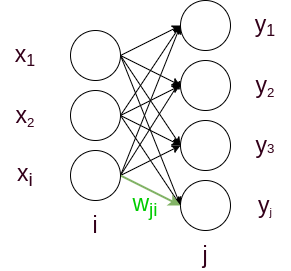

W cudzysłowie piszę "neuronami wejściowymi" x i "neuronami wyjściowymi" y, ponieważ w istocie warstwa gęsta może znajdować się między innymi warstwami (wręcz tak jest na ogół), więc od "prawdziwego wejścia i wyjścia" możemy znajdować się dość daleko. Również można się przestraszyć, że przez neuron rozumiemy byt biologiczny:

 ![neuron](https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png)


src: wikipedia

Podczas gdy przez $x_i$, $y_j$ czy $w_{ji}$ rozumiemy tutaj jako wartości liczbowe, czyli zilustrowana warstwa gęsta to w istocie nic innego jak dobrze znany układ równań liniowych: 

$$ y_1 = x_1 w_{11} + x_2 w_{12} + \cdots + x_i w_{1i} + b_1 $$ 
$$ y_2 = x_1 w_{21} + x_2 w_{22} + \cdots + x_i w_{2i} + b_2 $$ 
$$ y_3 = x_1 w_{31} + x_2 w_{32} + \cdots + x_i w_{3i} + b_3 $$ 
$$ y_j = x_1 w_{j1} + x_2 w_{j2} + \cdots + x_i w_{ji} + b_j $$ 

Który w sposób bardziej zwięzły można zapisać macierzowo:

$$ \begin{pmatrix} y_1 \\  y_2 \\ \vdots \\ y_j \end{pmatrix} = \begin{pmatrix}w_{11}  & \cdots & w_{1i}  \\ \vdots & \ddots & \vdots \\ w_{j1}  & \cdots & w_{ji} \end{pmatrix} \begin{pmatrix} x_1 \\  x_2 \\ \vdots \\ x_i \end{pmatrix} + \begin{pmatrix} b_1 \\  b_2 \\ \vdots \\ b_j \end{pmatrix}  $$  

Czyli:

$$ Y = WX + B $$

Implementacja, na razie baz kroku potrzebnego do później omawianego algorytmu wstecznej propagacji błędu, może wyglądać następująco:

```python
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    
    def forward(self, input):
        self.input = input
        return self.weights @ self.input + self.bias

    def backward(self, output_gradient, learning_rate):
        # TODO
        pass
```


Gdzie `Layer` jest klasą abstrakcyjną:

```python
from abc import ABC, abstractmethod

class Layer(ABC):
    def __init__(self):
        self.input = None
        self.output = None

    @abstractmethod
    def forward(self, input):
        pass

    @abstractmethod
    def backward(self, output_gradient, learning_rate):
        pass
```

# Logistyczna regresja jako prosta sieć neuronowa

Zaczęliśmy od warstwy gęstej, którą możemy traktować jak jeden z klocków, z którego budujemy sieci neuronowe. Dobrze, ale jedno to posiadanie cegły, a drugie to wiedza jak zbudować dom lub mniej metaforycznie - po co nam ta warstwa gęsta? 

Przyjrzyjmy się pewnemu szczególnemu przypadkowi: 

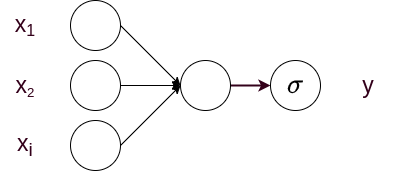

Mamy tutaj do czynienia z warstwą gęstą o pojedynczym neuronie wyjściowym oraz funkcją sigmoidalną, działającą na wynik działania warstwy gęstej: 

$$ y = \sigma( \begin{pmatrix}w_{11}  & \cdots & w_{1i}   \end{pmatrix} \begin{pmatrix} x_1 \\  x_2 \\ \vdots \\ x_i \end{pmatrix} + \begin{pmatrix} b_1 \\  b_2 \\ \vdots \\ b_j \end{pmatrix}) = \sigma( w^TX + B )$$

Z uwagi na pojedyncze wyjście macierz wag stał się tu wektorem, stąd notacja "położonego wektora" $w^T$.

Funkcja sigmoidalna jest zdefiniowana następująco:

$$ \sigma (y) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-y}}  $$ 



Jej wykres:





 ![logistic](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png)

src: wiki

Po rysunku widać, że funkcja sigmoidalna sprowadza wartości $y$ do przedziału $(0,1)$.

OK, ale czym właściwie jest ta specyficzna konstrukcja? Jest to nic innego jak regresja logistyczna, która jest szczególnym przypadkiem sieci neuronowej! Regresja logistyczna to siostra regresji liniowej, również jest modelem liniowym, ale zamiast do regresji służy do binarnej klasyfikacji. Samej regresji logistycznej raczej się do rozpoznawania obrazów nie wykorzystuje, ale na pożytek dydaktyczny można ją tak zilustrować:

![logistic_image_classification](https://miro.medium.com/max/1036/1*AQOZAD25B9jyDgzDqfjfWg.png)



src: https://medium.com/@mikeolugbenle/logistics-regression-with-neural-network-mindset-66d0d7e91d9f

Czyli po spłaszczeniu naszego zdjęcia do postaci jedno-wymiarowej, nasz model wyznaczy prawdopodobieństwo, że na zdjęciu występuje kot. Jest tylko jedno zagadnienie ... Ten model musi być wytrenowany! W ten sposób dochodzimy do clue całego Uczenia Maszynowego (ang. Machine Learning), a dokładniej jego pod-dziedziny jaką jest Uczenia Nadzorowane (bądź Uczenie z Nauczycielem, choć ten termin potrafi być mylący, z względu na Semi-Supervised Learnning i Student-Teacher Learning, ale to temat poza zakres tego notatnika). Aby dokonać trenowania, potrzebujemy danych zadnotowanych, czyli w tym przypadku nie tylko zdjęć kotów i innych zwierząt, ale również dodatkowej informacji, czy na zdjęciu jest kot, czy nie (może być w postaci dodatkowego pliku tekstowego, lub przy ustalonej konwencji nazewniczych plików *.jpg i/lub *.png). 

Oczywiście, są inne zagadnienia wizji komputerowej, gdzie nie wystarczy informacja o tym co jest na całym zdjęciu, ale trzeba np. w dedykowanym programie zaznaczać obwolutami prostokątnymi co i gdzie dokładnie się znajduje: 

![annotation](https://i.imgur.com/5nmgXlL.gif
)




Mając takie dane, możemy przystąpić do trenowania, ale ... czym ono jest? Kluczowym pojęciem jest tutaj minimalizacja błędu - czyli w jakiś sposób **definiujemy sobie błąd, a następnie modyfikujemy wagi tak, by jego wartość była jak najmniejsza - to jest właśnie proces trenowania!** Odchodząc od przypadku obrazowego, przypuśćmy, że nasz model regresji logistycznej określa prawdopodobieństwo odejścia klienta od usługodawcy w przeciągu najbliższego kwartału (tzw. Churn Prediction) i cechą jest tutaj liczba skarg. Czyli model jest bardzo prosty:  

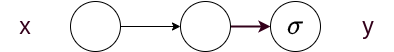

Losujemy wartości wagi $w$ i biasu $b$ i następnie korzystając z algorytmu stochastic gradient descent (jeśli czytelnikowi/czytelniczce jest to obce pojęcie, jest ono wyjaśniano od podstaw [tutaj](https://www.youtube.com/playlist?list=PL-zXMaIy-qJyHOIgEpO2MPFrbN96z9676)), znajdujemy optymalne wartości wagi $w$ i biasu $b$, dla których wartość błędu jest najmniejsza:  

![logistic_optimization](https://miro.medium.com/max/700/1*XRCJt-5yNXDfzrVbEbh4DA.gif)

src: https://towardsdatascience.com/animations-of-logistic-regression-with-python-31f8c9cb420



Pozostaje pytanie, jak definiujemy funkcje błędu? Jest to oczywiście bardzo związane z danym zagadnieniem. Przykładowo dla regresji, popularnym wyborem jest błąd średnio-kwadratowy (ang. Mean Square Error, MSE): 

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i-y^̂{ }_{i} )^2 $$

Czyli w przypadku regresji liniowej, dążymy do tego by suma odległości prostej od punktów była jak najmniejsza: 


![linear_optimization](https://alykhantejani.github.io/images/gradient_descent_line_graph.gif)




W przypadku klasyfikacji binarnej właściwszą funkcją kosztu jest binarna entropia skrośna: 

$$ E = -\frac{1}{n} \sum_{i=1}^{n} {(y_i \log(y^̂{ }_i) + (1 - y_i)\log(1 - y^̂{ }_i))} $$ 

gdzie $ y^̂{ }_{i} = \sigma ( \sum_{j=1}^{m} x_jw_j + b ) $

Aby przeprowadzić stochastic gradient descent, potrzebujemy $\frac{\partial E}{\partial W_j}$, by móc aktualizować wagi $W_j$:

$$ \frac{\partial E}{\partial W_j} = \frac{1}{n} \sum_{i=1}^{n} (y^̂{ }_i- y_i)x_i^j   $$

<font color='blue'>Uwaga: pewien misz-masz notacyjny, w poprzedniej sekcji dolny indeks oznaczał składową wektora $x$ i był umieszczony w dolnym indeksie, natomiast tutaj w dolnym indeksie oznaczamy indeks danego przykładu trenującego i etykiety (0 lub 1 w tym przypadku). W górnym indeksie podana jest składowa wektora $x$. Wszystkich przykładów trenujących jest $n$. </font>

Wtedy aktualizacja wagi $W_j$ w każdym kroku wyglądałaby następująco:




$$ W_j 	\leftarrow W_j - α \frac{1}{n} \sum_{i=1}^{n} (y^̂{ }_i- y_i)x_i^j   $$

gdzie $α$ to współczynnik uczenia

# Algorytm wstecznej propagacji błędu

W poprzedniej sekcji powiedzieliśmy sobie słów kilka o logistycznej regresji oraz o pojęciu trenowania (uczenia), rozumianego jako modyfikacja wartości wag jako minimalizacje błędu. Co pozostaje? Pozostaje problem trenowania bardziej skomplikowanych sieci neuronowych od logistycznej regresji. Problem pojawia się w momencie pojawienia się warstwy ukrytej (ang. hidden layer) między neuronami wejściowymi i wyjściowymi:

![MLP](http://hmkcode.github.io/images/ai/nn1.png)

src: https://hmkcode.com/ai/backpropagation-step-by-step/

Na powyższej ilustracji niebieskie elementy $h1$ i $h2$ oraz zielony $out$, przypominają regresje logistyczną, więc jakiś pomysł na wagi $w_5$ i $w_6$ może się tlić, ale co w przypadku tego co głębiej, tutaj $w_1$, $w_2$, $w_3$ i $w_4$? Tak dochodzimy do algorytmu wstecznej propagacji błędu.

Na chwilę zapomnijmy o warstwie gęstej, przez moment uogólnijmy ją na "jakąś" warstwę, z trenowalnymi parametrami $w$ - może jest to warstwa gęsta, a może później omawiana warstwa konwolucyjna (splotowa), na ten moment jest to nieważne. Podobnie nic nie wiemy o funkcji kosztu $E$ - wiemy, że jest jakiś błąd $E$, może jest to binarna entropia skrośna, może błąd średnio-kwadratowy, a może coś jeszcze innego. Ważne, że nasza warstwa posiada trenowalne parametry $W$ oraz na jej wejście ląduje $X$ i w jakiś sposób nasza warstwa produkuje wyjście $Y$, czyli możemy ją rozumieć jak funkcje: $f_W(X) = Y$.

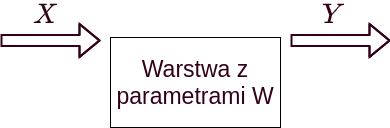

Tutaj zbliżamy się do algorytmu wstecznej propagacji błędu - skoro wstecznej to musimy "iść od końca", a skoro błąd to mówimy o pochodnej błędu względem wyjścia warstwy $\frac{\partial E}{\partial Y}$.   

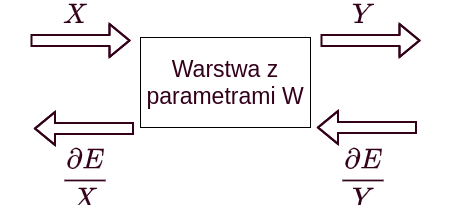

Otrzymując pochodną błędu względem wyjścia warstwy $\frac {\partial E}{\partial Y}$ musimy obliczyć dwie rzeczy. Z jednej strony, tak jak w przypadku regresji logistycznej, musimy wyznaczyć pochodną błędu względem wag $\frac {\partial E}{\partial W}$, ponieważ są to trenowalne parametry warstwy i muszą być aktualizowane zgodnie z stochastic gradient descent. Z drugiej strony potrzebujemy pochodnej błędu względem wejścia warstwy $\frac {\partial E}{\partial X}$, ponieważ będzie ona ostatecznie przekazana do poprzedniej warstwy, której wyjście jest tym samym co wejście do obecnie omawianej, czyli:

$$ X^{l} = Y^{l-1} $$
$$ \frac{\partial E}{\partial Y^{l-1}} = \frac{\partial E}{\partial X^{l}} $$


Graficznie możemy to zaprezentować tak:

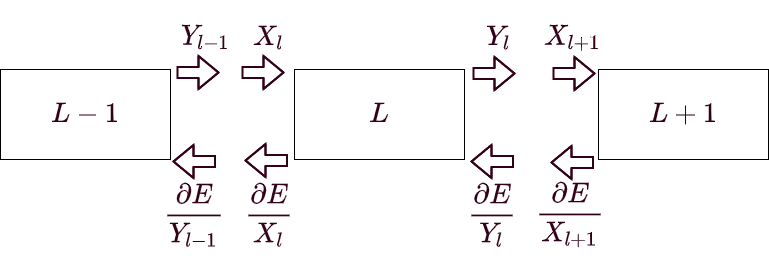

Oczywiście dla warstwy $L+1$, powyższe równania będą wyglądać tak:

$$ X^{l+1} = Y^{l} $$
$$ \frac{\partial E}{\partial Y^{l}} = \frac{\partial E}{\partial X^{l+1}} $$

A więc obliczając $\frac{\partial E}{\partial X^{l}} $ (czyli $\frac{\partial E}{\partial Y^{l-1}} $) możemy "iść" do poprzednich warstw, przekazując wyliczone dla dalszych warstw pochodne błędu. Teraz na rzecz rachunków, wróćmy do warstwy gęstej, czyli:

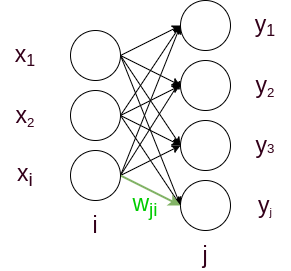

$$ y_1 = x_1 w_{11} + x_2 w_{12} + \cdots + x_i w_{1i} + b_1 $$ 
$$ y_2 = x_1 w_{21} + x_2 w_{22} + \cdots + x_i w_{2i} + b_2 $$ 
$$ y_3 = x_1 w_{31} + x_2 w_{32} + \cdots + x_i w_{3i} + b_3 $$ 
$$ y_j = x_1 w_{j1} + x_2 w_{j2} + \cdots + x_i w_{ji} + b_j $$ 

Zacznijmy od $\frac{\partial E}{\partial Y}$, czyli wektora:

$$ \frac{\partial E}{\partial Y} = \begin{pmatrix}\frac{\partial E}{\partial y_1 } \\ \vdots \\ \frac{\partial E}{\partial y_j }\end{pmatrix}$$

Powyższy $\frac{\partial E}{\partial Y}$ przyda nam się do wyznaczenia macierzy $\frac{\partial E}{\partial W}$: 

$$ \frac{\partial E}{\partial W} = \begin{pmatrix}\frac{\partial E}{\partial w_{11} } & \cdots & \frac{\partial E}{\partial w_{1i} } \\ \vdots & \ddots & \vdots \\ \frac{\partial E}{\partial w_{j1} } & \cdots & \frac{\partial E}{\partial w_{ji} }\end{pmatrix}$$

Policzmy sobie pojedynczy element $\frac{E}{w_{ji}}$. Z uwagi na wiele wyjść $y$ i regułę łańcuchową, mówimy o sumie:

$$ \frac{\partial E}{\partial w_{ji}} = \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial w_{ji}} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{ji}} = \frac{\partial E}{\partial y_j} x_i $$ 

Niemniej taki: $ y_1 = x_1 w_{11} + x_2 w_{12} + \cdots + x_i w_{1i} + b_1 $ nie zależy od $w_{ji}$, a więc jest stałą, czyli $\frac{\partial y_1}{\partial w_{ji}}=0$. Jedyną nie-stałą jest: $ y_i = x_1 w_{j1} + x_2 w_{j2} + \cdots + x_i \boldsymbol{w_{ji}} + b_j $ więc:

$$ \frac{\partial E}{\partial w_{ji}} = \frac{\partial E}{\partial y_j} \frac{\partial y_i}{\partial w_{ji}} = \frac{\partial E}{\partial y_j} \frac{\partial (x_1 w_{j1} + x_2 w_{j2} + \cdots + x_i \boldsymbol{w_{ji}} + b_j) }{\partial w_{ji}} = \frac{\partial E}{\partial y_j} x_i $$ 

Dla całego $\frac{\partial E}{\partial W}$ możemy to zapisać macierzowo:

$$ \frac{\partial E}{\partial W} = \begin{pmatrix}\frac{\partial E}{\partial y_1 } x_1 & \cdots & \frac{\partial E}{\partial y_1 }x_i \\ \vdots & \ddots & \vdots \\ \frac{\partial E}{\partial y_j }x_1 & \cdots & \frac{\partial E}{\partial y_j }x_i\end{pmatrix} = \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \vdots \\ \frac{\partial E}{\partial y_j} \end{pmatrix} \begin{pmatrix} x_1 & \cdots & x_i \end{pmatrix}  = \frac{\partial E}{\partial Y} X^T   $$ 

Powyżej wykorzystano iloczyn zewnętrzny, jego przypomnienie:

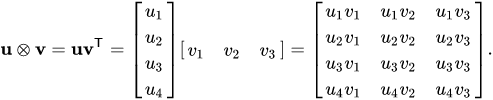

Korzystając z analogicznego podejścia możemy wyznaczyć, że $\frac{\partial E}{\partial B} = \frac{\partial E}{\partial Y}$.

## Ćwiczenie 1
Wyznacz $\frac{\partial E}{\partial B}$, tak jak zweryfikuj, że jest rzeczywiście równe $\frac{\partial E}{\partial Y}$ 

B - bias

$$ b_1 = -x_1 w_{11} - x_2 w_{12} - \cdots - x_i w_{1i} + y_1 $$ 
$$ b_2 = -x_1 w_{21} - x_2 w_{22} - \cdots - x_i w_{2i} + y_2 $$ 
$$ b_3 = -x_1 w_{31} - x_2 w_{32} - \cdots - x_i w_{3i} + y_3 $$ 
$$ b_j = -x_1 w_{j1} - x_2 w_{j2} - \cdots - x_i w_{ji} + y_j $$ 

$$ \frac{\partial E}{\partial B} = \begin{pmatrix}\frac{\partial E}{\partial b_1 } \\ \vdots \\ \frac{\partial E}{\partial b_j }\end{pmatrix}$$

Jedyną nie-stałą jest: $ b_i = -x_1 w_{j1} - x_2 w_{j2} - \cdots - x_i \boldsymbol{w_{ji}} + y_j $ więc:

$$ \frac{\partial E}{\partial w_{ji}} = \frac{\partial E}{\partial b_j} \frac{\partial b_i}{\partial w_{ji}} = \frac{\partial E}{\partial b_j} \frac{\partial (-x_1 w_{j1} - x_2 w_{j2} - \cdots - x_i \boldsymbol{w_{ji}} + y_j) }{\partial w_{ji}} = -\frac{\partial E}{\partial b_j} x_i $$ 


$$ \frac{\partial E}{\partial W} = \begin{pmatrix}-\frac{\partial E}{\partial b_1 } x_1 & \cdots & -\frac{\partial E}{\partial b_1 }x_i \\ \vdots & \ddots & \vdots \\ -\frac{\partial E}{\partial b_j }x_1 & \cdots & -\frac{\partial E}{\partial b_j }x_i\end{pmatrix} = \begin{pmatrix} \frac{\partial E}{\partial b_1} \\ \vdots \\ \frac{\partial E}{\partial b_j} \end{pmatrix} \begin{pmatrix} -x_1 & \cdots & -x_i \end{pmatrix}  = -\frac{\partial E}{\partial B} X^T   $$ 

Komórka na rozwiązanie:





Pozostaje wyznaczyć $\frac{\partial E}{\partial X}$. Podobnie jak wcześniej przyjrzymy się pojedynczemu elementowi, a następnie uogólnimy na resztę:

$$ \frac{\partial E}{\partial x_i} = \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_i} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_i} $$

Tutaj już nie mamy zerowania elementów, nie ma żadnych stałych względem $x_i$, od którego każdy $y$ zależy:

$$ y_1 = x_1 w_{11} + x_2 w_{12} + \cdots + \boldsymbol{x_i} w_{1i} + b_1 $$ 
$$ y_2 = x_1 w_{21} + x_2 w_{22} + \cdots + \boldsymbol{x_i} w_{2i} + b_2 $$ 
$$ y_3 = x_1 w_{31} + x_2 w_{32} + \cdots + \boldsymbol{x_i} w_{3i} + b_3 $$ 
$$ y_i = x_1 w_{j1} + x_2 w_{j2} + \cdots + \boldsymbol{x_i} w_{ji} + b_j $$ 

A więc:

$$ \frac{\partial E}{\partial x_i} = \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_i} + \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_i} = \frac{\partial E}{\partial y_1} w_{1i} + \cdots + \frac{\partial E}{\partial y_j} w_{ji}  $$



Przejdźmy z pojedynczego elementu na wszystkie, poprzez zapis macierzowy:

$$ \frac{\partial E}{\partial X} = \begin{pmatrix}\frac{\partial E}{\partial y_1}w_{11} + \frac{\partial E}{\partial y_2}w_{21}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{j1} \\ 
\frac{\partial E}{\partial y_1}w_{12} + \frac{\partial E}{\partial y_2}w_{22}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{j2} \\
 & \vdots \\ \frac{\partial E}{\partial y_1}w_{1i} + \frac{\partial E}{\partial y_2}w_{2i}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{ji}\end{pmatrix}$$

Możemy przedstawić $\frac{\partial E}{\partial X}$ również poprzez mnożenie macierzowe, korzystając z $\frac{\partial E}{\partial Y}$:

$$ \frac{\partial E}{\partial X} = \begin{pmatrix}\frac{\partial E}{\partial y_1}w_{11} + \frac{\partial E}{\partial y_2}w_{21}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{j1} \\ 
\frac{\partial E}{\partial y_1}w_{12} + \frac{\partial E}{\partial y_2}w_{22}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{j2} \\
 & \vdots \\ \frac{\partial E}{\partial y_1}w_{1i} + \frac{\partial E}{\partial y_2}w_{2i}  + & \cdots & + \frac{\partial E}{\partial y_j }w_{ji}\end{pmatrix} = \begin{pmatrix}w_{11} & w_{21}  & \cdots & w_{j1} \\ w_{12} & w_{22} & \cdots & w_{j2} \\ \vdots & \vdots & \ddots & \vdots \\ w_{1j} & w_{2j} & \cdots & w_{ij} \end{pmatrix} \begin{pmatrix}\frac{\partial E}{\partial y_1 } \\ \vdots \\ \frac{\partial E}{\partial y_j }\end{pmatrix}$$ 

Zwięźlej:

$$ \frac{\partial E}{\partial X} = W^T \frac{\partial E}{\partial Y}  $$

Podsumowując, w celu implementacji algorytmu wstecznej propagacji błędu, potrzebowaliśmy wyznaczyć $\frac{\partial E}{\partial W}$, $\frac{\partial E}{\partial B}$ i $\frac{\partial E}{\partial X}$, które wynoszą odpowiednio: 

$$ \frac{\partial E}{\partial W} = \frac{\partial E}{\partial Y} X^T   $$ 
$$ \frac{\partial E}{\partial B} = \frac{\partial E}{\partial Y}    $$ 
$$ \frac{\partial E}{\partial X} = W^T \frac{\partial E}{\partial Y}  $$

Teraz możemy wrócić do kodu, do naszej metody `backward`:

```python
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    
    def forward(self, input):
        self.input = input
        return self.weights @ self.input + self.bias

    def backward(self, output_gradient, learning_rate):
        # TODO
        pass
```

Przez `output_gradient` rozumiemy $\frac{\partial E}{\partial Y}$. $\frac{\partial E}{\partial W}$ oznaczmy jako `weights_gradient` i wynosi on zgodnie z równaniem $ \frac{\partial E}{\partial W} = \frac{\partial E}{\partial Y} X^T $:

```python
weights_gradient = output_gradient @ self.input.T
```
Alternatywnie można by powyższe zapiasać `np.dot(output_gradient, self.input.T)`, ale użycie `@` jest zwięźlejsze. Aby zaktualizować wagi, musimy wykorzystać `learning_rate`:

```python
self.weights -= learning_rate*weights_gradient 
```

Z metody zwracamy $\frac{\partial E}{\partial X}$, który stanie się dla kolejnej warstwy $\frac{\partial E}{\partial Y}$, czyli `output_gradient`:

```python
self.weights.T @ output_gradient
```







Prawie całość wygląda tak:


```python
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return self.weights @ self.input + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = output_gradient @ self.input.T
        input_gradient = self.weights.T @ output_gradient
        self.weights -= learning_rate * weights_gradient
#         należy dodać dla biasu
        bias_gradient = output_gradient*self.input.shape[0]
        self.bias -= learning_rate * bias_gradient
        return input_gradient
```

## Ćwiczenie 2
Czego brakuje w powyższym kodzie? Uzupełnij.

# Funkcja Aktywacji

Widzieliśmy już jedną z możliwych funkcji aktywacji w sekcji dot. regresji logistycznej, jaką była funkcja sigmoidalna $ \sigma (y) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-y}} $.
Dlaczego nieliniowe funkcje aktywacji są ważne? Z jednej strony, taka funkcja sigmoidalna zapewnia nam zakres wartości $(0,1)$ co zabezpiecza nas na ewentualność bardzo wysokich wartości spowodowanych operacjami liniowymi $WX+B$. Jest też drugi powód, natury nienumerycznej - bardzo często spotykamy się z danymi, których zależności są nieliniowe. Przykładem jest poniższa wizualizacja:


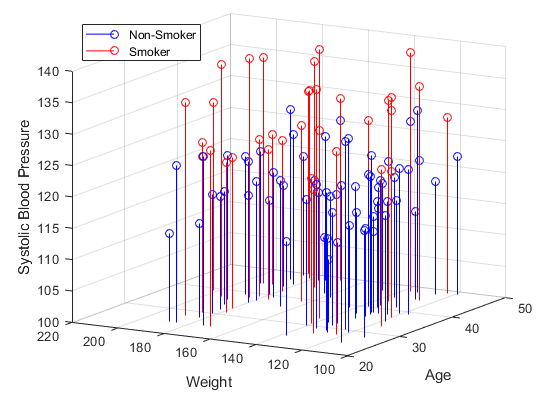

src: https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253

Wyznaczenie płaszczyzny separującej palaczy od niepalących jest niemożliwe. Właśnie dlatego sieci neuronowe, jak i inne algorytmy uczenia maszynowego dążą do nieliniowości:

![classifiers](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

src: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


Wiedząc już, że potrzebujemy funkcji aktywacji, przejdźmy do potrzebnych składników, aby ją zaimplementować - w rozumieniu kodowym warstwę, która będzie ją realizować. W przypadku metody `forward`, mówimy o wejściu $X$, które poddamy funkcji aktywacji $f$, czyli na wyjściu zwrócimy $Y=f(X)$ i za to będzie odpowiedzialna metoda `forward`:  

```python
def forward(self, input):
    self.input = input
    return self.activation(self.input)
```

Później wrócimy do tego, czym jest `self.activation`, teraz przechodząc do metody `backward`, której argumentem jest `output_gradient`, czyli $\frac{\partial E}{\partial Y}$. Podobnie jak wcześniej, zwróćmy uwagę na $y$:

$$ y_1 = f(x_1) $$ 
$$ y_2 = f(x_2) $$ 
$$ y_i = f(x_i) $$ 

Gdzie $f$ to nasza funkcja aktywacji np. sigmoidalna.

W takim razie przyjrzyjmy się $\frac{\partial E}{\partial x_1}$:

$$\frac{\partial E}{\partial x_i} = \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_i} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_i} + \cdots + \frac{\partial E}{\partial y_i}\frac{\partial y_i}{\partial x_i} $$

Tutaj dojdzie do zerowania wszystkich elementów z wyjątkiem $\frac{\partial E}{\partial y_i}\frac{\partial y_i}{\partial x_i}$, bo reszta członów to stałe względem $x_i$. A więc:

$$\frac{\partial E}{\partial x_i} = \frac{\partial E}{\partial y_i}\frac{\partial y_i}{\partial x_i} = \frac{\partial E}{\partial y_i} f'(x_i)$$

Przechodząc do wyrażenia na wszystkie elementy:

$$ \frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y}\odot f'(X)$$

Gdzie $\odot$ to [produkt Hadamarda](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)), czyli jest to "zwykłe wymnażanie".

Mając $ \frac{\partial E}{\partial X} $ możemy wrócić do implementacji, a dokładniej do metody `backward`:

```python
class Activation(Layer):
    def __init__(self, activation, activation_prime):
         self.activation = activation
         self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        # dE/dX
        input_gradient = self.weights.T @ output_gradient
        # dE/dY = output_gradient
        # f(X) = output -> self.input ???
        
        input_gradient = np.multiply(output_gradient, np.diff(y)/diff(x) )
        input_gradient = np.multiply(output_gradient, self.activation_prime(self.input) )
        
        return input_gradient
```

## Ćwiczenie 3

Uzupełnij metodę `backward`.


Przejdźmy do w końcu do wyboru naszej funkcji aktywacji - jest ich wiele, ale przykładem będzie tangens hiperpobliczny:

![tanh](https://miro.medium.com/max/600/1*51Q7QouspCkOvENni2RwfQ.png)



Pochodna tangensu hiperbolicznego to $1 - tanh^2(x)$. Dokonajmy dziedziczenia naszej warstwy aktywacji `Activation` i zainicjalizujmy ją tymże tangensem i jego pochodną:


```python 
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)
```

Ta implementacja zamyka temat funcji aktywacji. Pozostaje funkcja kosztu.

# Funkcja Kosztu

Wracając do rysunku:

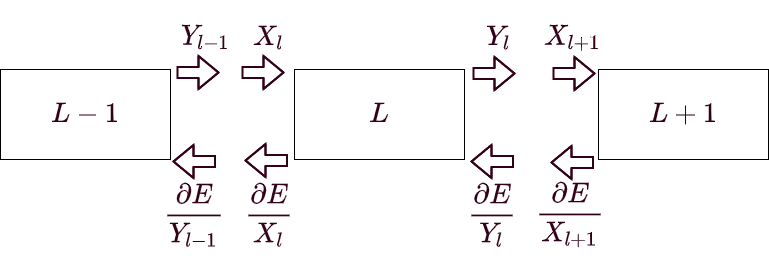

Wiemy, że w trakcie wstecznej propagacji błędu przekazywany jest $\frac{\partial E}{\partial Y}$ z następnej warstwy - ale kiedyś musi nastąpić ta ostatnia warstwa, która inicjuje całą procedurę. W tej ostatniej warstwie definiujemy koszt $E$ i wyznaczamy $\frac{\partial E}{\partial Y}$. Niech funkcją kosztu będzie błąd średnio-kwadratowy:

$$E = \frac{1}{n}\sum_i(y^*-y)^2 $$

Wyznaczmy $\frac{\partial E}{\partial y_1}$:

$$\frac{\partial E}{\partial y_1} = \frac{\partial}{\partial y_1}\frac{1}{n}[(y_1^*-y_1)^2+(y_2^*-y_2)^2+\cdots+(y_n^*-y_n)^2] = \frac{\partial}{\partial y_1}\frac{1}{n}(y_1^*-y_1)^2 = \frac{2}{n}(y_1-y_1^*)$$

Podobnie jak wcześiej, dochodzi do zerowania elementów i też jak wcześniej, uogólniamy na wszystkie elementy:

$$\frac{\partial E}{\partial Y} = \frac{2}{n}(Y-Y^*) $$




W kodzie możemy $E$ oraz $\frac{\partial E}{\partial Y}$ zapisać jako funkcje `mse` i `mse_prime`:

```python
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred-y_true) / np.size(y_true)
```

Teraz już mamy wszystko, by móc stworzyć sieć neuronową i dokonać jej trenowania!

# Trening Sieci Neuronowej

Nasza sieć będzie przygotowana na wejścia 2-wymiarowe i będzie kończyła się pojedycznym wyjściem:

```python
network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()
]
```

Nasz sztuczny zbiór danych:

```python
X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4,2,1))
```
oraz etykiety:
```python
Y = np.reshape([[0],[1],[1],[0]], (4,1,1))
```

W końcu procedura treningowa:

```python
epochs = 10000 # jedna epoka rozumiana jako przejście przez cały zbiór danych
learning_rate = 0.1

for epoch in range(epochs):
    error = 0.0
    for x, y in zip(X, Y): # pobieramy parę przykład trenujący i jego etykieta
        # forward
        output = x # pierwszym wejściem będzie x, następnymi wyniki działania kolejnych warstw
        for layer in network:
            output = layer(output)

        # wyznaczamy błąd
        error += mse(y, output) # ostatni output to nasza predykcja

        # backward
        grad = mse_prime(y, output) # pierwszym gradientem będzie mse_prime, każdym następny wyznaczayny przez kolejne warstwy (licząc od końca)
        for layer in reversed(network): # dzięki reversed idziemy od końca
            grad = layer.backward(grad, learning_rate)
    error /= len(X)
    print('%d/%d, error=%f'%(e+1, epochs, error))
```




https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9

# Zadanie
Teraz mamy już wszystko. Skorzystaj z fragmentów kodu, tworząc swoją sieć i przeprowadzając jej trening! 

In [7]:
from abc import ABC, abstractmethod
import numpy as np

class Layer(ABC):
    def __init__(self):
        self.input = None
        self.output = None

    @abstractmethod
    def forward(self, input):
        pass

    @abstractmethod
    def backward(self, output_gradient, learning_rate):
        pass

In [8]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred-y_true) / np.size(y_true)

In [9]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return self.weights @ self.input + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = output_gradient @ self.input.T
        input_gradient = self.weights.T @ output_gradient
        self.weights -= learning_rate * weights_gradient
        bias_gradient = output_gradient*self.input.shape[0]
        self.bias -= learning_rate * bias_gradient
        
        assert weights_gradient.shape == self.weights.shape
        
        assert bias_gradient.shape == self.bias.shape
        
        return input_gradient

In [10]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
         self.activation = activation
         self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        input_gradient = np.multiply(output_gradient, self.activation_prime(self.input))
        return input_gradient

In [11]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

In [12]:
network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()
]

In [13]:
X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4,2,1))

In [14]:
Y = np.reshape([[0],[1],[1],[0]], (4,1,1))

In [15]:
epochs = 10000 # jedna epoka rozumiana jako przejście przez cały zbiór danych
learning_rate = 0.1

for epoch in range(epochs):
    error = 0.0
    for x, y in zip(X, Y): # pobieramy parę przykład trenujący i jego etykieta
        # forward
        output = x # pierwszym wejściem będzie x, następnymi wyniki działania kolejnych warstw
        for layer in network:
            output = layer.forward(output)

        # wyznaczamy błąd
        error += mse(y, output) # ostatni output to nasza predykcja

        # backward
        grad = mse_prime(y, output) # pierwszym gradientem będzie mse_prime, każdym następny wyznaczayny przez kolejne warstwy (licząc od końca)
        for layer in reversed(network): # dzięki reversed idziemy od końca
            grad = layer.backward(grad, learning_rate)
    error /= len(X)
    print('%d/%d, error=%f'%(epoch+1, epochs, error))

1/10000, error=0.654147
2/10000, error=0.423083
3/10000, error=0.394135
4/10000, error=0.393175
5/10000, error=0.389480
6/10000, error=0.386612
7/10000, error=0.384015
8/10000, error=0.381446
9/10000, error=0.378733
10/10000, error=0.375761
11/10000, error=0.372446
12/10000, error=0.368718
13/10000, error=0.364504
14/10000, error=0.359732
15/10000, error=0.354329
16/10000, error=0.348221
17/10000, error=0.341343
18/10000, error=0.333645
19/10000, error=0.325109
20/10000, error=0.315765
21/10000, error=0.305718
22/10000, error=0.295171
23/10000, error=0.284434
24/10000, error=0.273903
25/10000, error=0.264005
26/10000, error=0.255109
27/10000, error=0.247444
28/10000, error=0.241071
29/10000, error=0.235911
30/10000, error=0.231805
31/10000, error=0.228571
32/10000, error=0.226036
33/10000, error=0.224052
34/10000, error=0.222494
35/10000, error=0.221263
36/10000, error=0.220278
37/10000, error=0.219475
38/10000, error=0.218806
39/10000, error=0.218233
40/10000, error=0.217729
41/10000,

417/10000, error=0.000939
418/10000, error=0.000934
419/10000, error=0.000930
420/10000, error=0.000925
421/10000, error=0.000920
422/10000, error=0.000915
423/10000, error=0.000911
424/10000, error=0.000906
425/10000, error=0.000902
426/10000, error=0.000897
427/10000, error=0.000893
428/10000, error=0.000888
429/10000, error=0.000884
430/10000, error=0.000879
431/10000, error=0.000875
432/10000, error=0.000871
433/10000, error=0.000867
434/10000, error=0.000862
435/10000, error=0.000858
436/10000, error=0.000854
437/10000, error=0.000850
438/10000, error=0.000846
439/10000, error=0.000842
440/10000, error=0.000838
441/10000, error=0.000834
442/10000, error=0.000830
443/10000, error=0.000826
444/10000, error=0.000822
445/10000, error=0.000819
446/10000, error=0.000815
447/10000, error=0.000811
448/10000, error=0.000807
449/10000, error=0.000804
450/10000, error=0.000800
451/10000, error=0.000797
452/10000, error=0.000793
453/10000, error=0.000789
454/10000, error=0.000786
455/10000, e

893/10000, error=0.000257
894/10000, error=0.000256
895/10000, error=0.000256
896/10000, error=0.000255
897/10000, error=0.000255
898/10000, error=0.000255
899/10000, error=0.000254
900/10000, error=0.000254
901/10000, error=0.000253
902/10000, error=0.000253
903/10000, error=0.000253
904/10000, error=0.000252
905/10000, error=0.000252
906/10000, error=0.000251
907/10000, error=0.000251
908/10000, error=0.000251
909/10000, error=0.000250
910/10000, error=0.000250
911/10000, error=0.000249
912/10000, error=0.000249
913/10000, error=0.000249
914/10000, error=0.000248
915/10000, error=0.000248
916/10000, error=0.000247
917/10000, error=0.000247
918/10000, error=0.000247
919/10000, error=0.000246
920/10000, error=0.000246
921/10000, error=0.000246
922/10000, error=0.000245
923/10000, error=0.000245
924/10000, error=0.000244
925/10000, error=0.000244
926/10000, error=0.000244
927/10000, error=0.000243
928/10000, error=0.000243
929/10000, error=0.000243
930/10000, error=0.000242
931/10000, e

1355/10000, error=0.000146
1356/10000, error=0.000146
1357/10000, error=0.000146
1358/10000, error=0.000146
1359/10000, error=0.000146
1360/10000, error=0.000146
1361/10000, error=0.000146
1362/10000, error=0.000145
1363/10000, error=0.000145
1364/10000, error=0.000145
1365/10000, error=0.000145
1366/10000, error=0.000145
1367/10000, error=0.000145
1368/10000, error=0.000145
1369/10000, error=0.000144
1370/10000, error=0.000144
1371/10000, error=0.000144
1372/10000, error=0.000144
1373/10000, error=0.000144
1374/10000, error=0.000144
1375/10000, error=0.000144
1376/10000, error=0.000143
1377/10000, error=0.000143
1378/10000, error=0.000143
1379/10000, error=0.000143
1380/10000, error=0.000143
1381/10000, error=0.000143
1382/10000, error=0.000143
1383/10000, error=0.000143
1384/10000, error=0.000142
1385/10000, error=0.000142
1386/10000, error=0.000142
1387/10000, error=0.000142
1388/10000, error=0.000142
1389/10000, error=0.000142
1390/10000, error=0.000142
1391/10000, error=0.000142
1

1820/10000, error=0.000101
1821/10000, error=0.000101
1822/10000, error=0.000101
1823/10000, error=0.000101
1824/10000, error=0.000101
1825/10000, error=0.000101
1826/10000, error=0.000101
1827/10000, error=0.000101
1828/10000, error=0.000101
1829/10000, error=0.000101
1830/10000, error=0.000101
1831/10000, error=0.000100
1832/10000, error=0.000101
1833/10000, error=0.000100
1834/10000, error=0.000100
1835/10000, error=0.000100
1836/10000, error=0.000100
1837/10000, error=0.000101
1838/10000, error=0.000100
1839/10000, error=0.000100
1840/10000, error=0.000100
1841/10000, error=0.000100
1842/10000, error=0.000101
1843/10000, error=0.000100
1844/10000, error=0.000100
1845/10000, error=0.000100
1846/10000, error=0.000100
1847/10000, error=0.000101
1848/10000, error=0.000100
1849/10000, error=0.000101
1850/10000, error=0.000100
1851/10000, error=0.000100
1852/10000, error=0.000101
1853/10000, error=0.000100
1854/10000, error=0.000101
1855/10000, error=0.000100
1856/10000, error=0.000101
1

2310/10000, error=0.000078
2311/10000, error=0.000078
2312/10000, error=0.000078
2313/10000, error=0.000078
2314/10000, error=0.000078
2315/10000, error=0.000078
2316/10000, error=0.000078
2317/10000, error=0.000078
2318/10000, error=0.000078
2319/10000, error=0.000077
2320/10000, error=0.000077
2321/10000, error=0.000077
2322/10000, error=0.000077
2323/10000, error=0.000077
2324/10000, error=0.000077
2325/10000, error=0.000077
2326/10000, error=0.000077
2327/10000, error=0.000077
2328/10000, error=0.000077
2329/10000, error=0.000077
2330/10000, error=0.000077
2331/10000, error=0.000077
2332/10000, error=0.000077
2333/10000, error=0.000077
2334/10000, error=0.000077
2335/10000, error=0.000077
2336/10000, error=0.000077
2337/10000, error=0.000077
2338/10000, error=0.000077
2339/10000, error=0.000077
2340/10000, error=0.000077
2341/10000, error=0.000077
2342/10000, error=0.000077
2343/10000, error=0.000076
2344/10000, error=0.000076
2345/10000, error=0.000076
2346/10000, error=0.000076
2

2768/10000, error=0.000115
2769/10000, error=0.000117
2770/10000, error=0.000126
2771/10000, error=0.000133
2772/10000, error=0.000142
2773/10000, error=0.000130
2774/10000, error=0.000128
2775/10000, error=0.000133
2776/10000, error=0.000145
2777/10000, error=0.000159
2778/10000, error=0.000149
2779/10000, error=0.000145
2780/10000, error=0.000143
2781/10000, error=0.000157
2782/10000, error=0.000177
2783/10000, error=0.000172
2784/10000, error=0.000168
2785/10000, error=0.000158
2786/10000, error=0.000170
2787/10000, error=0.000194
2788/10000, error=0.000198
2789/10000, error=0.000197
2790/10000, error=0.000179
2791/10000, error=0.000186
2792/10000, error=0.000209
2793/10000, error=0.000225
2794/10000, error=0.000233
2795/10000, error=0.000210
2796/10000, error=0.000207
2797/10000, error=0.000224
2798/10000, error=0.000251
2799/10000, error=0.000271
2800/10000, error=0.000249
2801/10000, error=0.000236
2802/10000, error=0.000241
2803/10000, error=0.000276
2804/10000, error=0.000309
2

3222/10000, error=0.000054
3223/10000, error=0.000054
3224/10000, error=0.000055
3225/10000, error=0.000054
3226/10000, error=0.000054
3227/10000, error=0.000054
3228/10000, error=0.000054
3229/10000, error=0.000054
3230/10000, error=0.000054
3231/10000, error=0.000054
3232/10000, error=0.000054
3233/10000, error=0.000054
3234/10000, error=0.000054
3235/10000, error=0.000054
3236/10000, error=0.000054
3237/10000, error=0.000054
3238/10000, error=0.000054
3239/10000, error=0.000054
3240/10000, error=0.000054
3241/10000, error=0.000054
3242/10000, error=0.000053
3243/10000, error=0.000054
3244/10000, error=0.000054
3245/10000, error=0.000053
3246/10000, error=0.000054
3247/10000, error=0.000053
3248/10000, error=0.000053
3249/10000, error=0.000054
3250/10000, error=0.000053
3251/10000, error=0.000054
3252/10000, error=0.000053
3253/10000, error=0.000053
3254/10000, error=0.000054
3255/10000, error=0.000053
3256/10000, error=0.000054
3257/10000, error=0.000053
3258/10000, error=0.000053
3

3689/10000, error=0.000249
3690/10000, error=0.000277
3691/10000, error=0.000273
3692/10000, error=0.000251
3693/10000, error=0.000223
3694/10000, error=0.000232
3695/10000, error=0.000258
3696/10000, error=0.000268
3697/10000, error=0.000257
3698/10000, error=0.000225
3699/10000, error=0.000219
3700/10000, error=0.000236
3701/10000, error=0.000257
3702/10000, error=0.000260
3703/10000, error=0.000228
3704/10000, error=0.000211
3705/10000, error=0.000216
3706/10000, error=0.000240
3707/10000, error=0.000255
3708/10000, error=0.000231
3709/10000, error=0.000208
3710/10000, error=0.000200
3711/10000, error=0.000222
3712/10000, error=0.000244
3713/10000, error=0.000230
3714/10000, error=0.000208
3715/10000, error=0.000190
3716/10000, error=0.000204
3717/10000, error=0.000226
3718/10000, error=0.000225
3719/10000, error=0.000210
3720/10000, error=0.000185
3721/10000, error=0.000188
3722/10000, error=0.000206
3723/10000, error=0.000215
3724/10000, error=0.000210
3725/10000, error=0.000183
3

4141/10000, error=0.000047
4142/10000, error=0.000046
4143/10000, error=0.000046
4144/10000, error=0.000045
4145/10000, error=0.000045
4146/10000, error=0.000047
4147/10000, error=0.000046
4148/10000, error=0.000046
4149/10000, error=0.000045
4150/10000, error=0.000045
4151/10000, error=0.000046
4152/10000, error=0.000046
4153/10000, error=0.000047
4154/10000, error=0.000045
4155/10000, error=0.000045
4156/10000, error=0.000046
4157/10000, error=0.000046
4158/10000, error=0.000047
4159/10000, error=0.000045
4160/10000, error=0.000046
4161/10000, error=0.000045
4162/10000, error=0.000046
4163/10000, error=0.000048
4164/10000, error=0.000046
4165/10000, error=0.000046
4166/10000, error=0.000045
4167/10000, error=0.000046
4168/10000, error=0.000047
4169/10000, error=0.000046
4170/10000, error=0.000047
4171/10000, error=0.000045
4172/10000, error=0.000046
4173/10000, error=0.000047
4174/10000, error=0.000047
4175/10000, error=0.000048
4176/10000, error=0.000046
4177/10000, error=0.000046
4

4593/10000, error=0.000088
4594/10000, error=0.000089
4595/10000, error=0.000096
4596/10000, error=0.000102
4597/10000, error=0.000094
4598/10000, error=0.000087
4599/10000, error=0.000084
4600/10000, error=0.000090
4601/10000, error=0.000098
4602/10000, error=0.000094
4603/10000, error=0.000088
4604/10000, error=0.000081
4605/10000, error=0.000084
4606/10000, error=0.000092
4607/10000, error=0.000092
4608/10000, error=0.000089
4609/10000, error=0.000080
4610/10000, error=0.000080
4611/10000, error=0.000085
4612/10000, error=0.000089
4613/10000, error=0.000090
4614/10000, error=0.000080
4615/10000, error=0.000077
4616/10000, error=0.000079
4617/10000, error=0.000084
4618/10000, error=0.000088
4619/10000, error=0.000081
4620/10000, error=0.000076
4621/10000, error=0.000074
4622/10000, error=0.000079
4623/10000, error=0.000086
4624/10000, error=0.000081
4625/10000, error=0.000076
4626/10000, error=0.000071
4627/10000, error=0.000074
4628/10000, error=0.000081
4629/10000, error=0.000080
4

5023/10000, error=0.000046
5024/10000, error=0.000047
5025/10000, error=0.000044
5026/10000, error=0.000044
5027/10000, error=0.000044
5028/10000, error=0.000046
5029/10000, error=0.000048
5030/10000, error=0.000046
5031/10000, error=0.000045
5032/10000, error=0.000044
5033/10000, error=0.000045
5034/10000, error=0.000048
5035/10000, error=0.000047
5036/10000, error=0.000046
5037/10000, error=0.000044
5038/10000, error=0.000045
5039/10000, error=0.000047
5040/10000, error=0.000048
5041/10000, error=0.000048
5042/10000, error=0.000045
5043/10000, error=0.000045
5044/10000, error=0.000047
5045/10000, error=0.000048
5046/10000, error=0.000049
5047/10000, error=0.000046
5048/10000, error=0.000045
5049/10000, error=0.000046
5050/10000, error=0.000048
5051/10000, error=0.000050
5052/10000, error=0.000048
5053/10000, error=0.000047
5054/10000, error=0.000045
5055/10000, error=0.000047
5056/10000, error=0.000050
5057/10000, error=0.000049
5058/10000, error=0.000048
5059/10000, error=0.000046
5

5455/10000, error=0.000071
5456/10000, error=0.000067
5457/10000, error=0.000068
5458/10000, error=0.000073
5459/10000, error=0.000078
5460/10000, error=0.000072
5461/10000, error=0.000067
5462/10000, error=0.000064
5463/10000, error=0.000069
5464/10000, error=0.000075
5465/10000, error=0.000073
5466/10000, error=0.000069
5467/10000, error=0.000063
5468/10000, error=0.000065
5469/10000, error=0.000071
5470/10000, error=0.000072
5471/10000, error=0.000071
5472/10000, error=0.000063
5473/10000, error=0.000062
5474/10000, error=0.000066
5475/10000, error=0.000070
5476/10000, error=0.000071
5477/10000, error=0.000065
5478/10000, error=0.000061
5479/10000, error=0.000062
5480/10000, error=0.000066
5481/10000, error=0.000071
5482/10000, error=0.000066
5483/10000, error=0.000062
5484/10000, error=0.000059
5485/10000, error=0.000063
5486/10000, error=0.000068
5487/10000, error=0.000066
5488/10000, error=0.000063
5489/10000, error=0.000058
5490/10000, error=0.000059
5491/10000, error=0.000064
5

5891/10000, error=0.000043
5892/10000, error=0.000040
5893/10000, error=0.000041
5894/10000, error=0.000044
5895/10000, error=0.000044
5896/10000, error=0.000045
5897/10000, error=0.000041
5898/10000, error=0.000041
5899/10000, error=0.000043
5900/10000, error=0.000044
5901/10000, error=0.000046
5902/10000, error=0.000043
5903/10000, error=0.000042
5904/10000, error=0.000042
5905/10000, error=0.000044
5906/10000, error=0.000046
5907/10000, error=0.000044
5908/10000, error=0.000043
5909/10000, error=0.000041
5910/10000, error=0.000043
5911/10000, error=0.000046
5912/10000, error=0.000046
5913/10000, error=0.000045
5914/10000, error=0.000042
5915/10000, error=0.000042
5916/10000, error=0.000045
5917/10000, error=0.000046
5918/10000, error=0.000047
5919/10000, error=0.000043
5920/10000, error=0.000042
5921/10000, error=0.000044
5922/10000, error=0.000046
5923/10000, error=0.000048
5924/10000, error=0.000045
5925/10000, error=0.000043
5926/10000, error=0.000043
5927/10000, error=0.000045
5

6317/10000, error=0.000070
6318/10000, error=0.000066
6319/10000, error=0.000060
6320/10000, error=0.000061
6321/10000, error=0.000067
6322/10000, error=0.000070
6323/10000, error=0.000068
6324/10000, error=0.000061
6325/10000, error=0.000059
6326/10000, error=0.000063
6327/10000, error=0.000067
6328/10000, error=0.000070
6329/10000, error=0.000063
6330/10000, error=0.000059
6331/10000, error=0.000059
6332/10000, error=0.000064
6333/10000, error=0.000069
6334/10000, error=0.000065
6335/10000, error=0.000060
6336/10000, error=0.000057
6337/10000, error=0.000060
6338/10000, error=0.000066
6339/10000, error=0.000066
6340/10000, error=0.000063
6341/10000, error=0.000057
6342/10000, error=0.000057
6343/10000, error=0.000062
6344/10000, error=0.000065
6345/10000, error=0.000065
6346/10000, error=0.000058
6347/10000, error=0.000056
6348/10000, error=0.000058
6349/10000, error=0.000062
6350/10000, error=0.000065
6351/10000, error=0.000060
6352/10000, error=0.000056
6353/10000, error=0.000055
6

6776/10000, error=0.000038
6777/10000, error=0.000041
6778/10000, error=0.000039
6779/10000, error=0.000038
6780/10000, error=0.000036
6781/10000, error=0.000037
6782/10000, error=0.000040
6783/10000, error=0.000040
6784/10000, error=0.000040
6785/10000, error=0.000037
6786/10000, error=0.000037
6787/10000, error=0.000039
6788/10000, error=0.000040
6789/10000, error=0.000041
6790/10000, error=0.000038
6791/10000, error=0.000037
6792/10000, error=0.000037
6793/10000, error=0.000039
6794/10000, error=0.000042
6795/10000, error=0.000039
6796/10000, error=0.000038
6797/10000, error=0.000037
6798/10000, error=0.000038
6799/10000, error=0.000041
6800/10000, error=0.000041
6801/10000, error=0.000040
6802/10000, error=0.000037
6803/10000, error=0.000038
6804/10000, error=0.000040
6805/10000, error=0.000041
6806/10000, error=0.000041
6807/10000, error=0.000038
6808/10000, error=0.000037
6809/10000, error=0.000039
6810/10000, error=0.000041
6811/10000, error=0.000043
6812/10000, error=0.000040
6

7255/10000, error=0.000053
7256/10000, error=0.000057
7257/10000, error=0.000060
7258/10000, error=0.000055
7259/10000, error=0.000051
7260/10000, error=0.000050
7261/10000, error=0.000054
7262/10000, error=0.000059
7263/10000, error=0.000057
7264/10000, error=0.000053
7265/10000, error=0.000049
7266/10000, error=0.000051
7267/10000, error=0.000056
7268/10000, error=0.000057
7269/10000, error=0.000055
7270/10000, error=0.000049
7271/10000, error=0.000049
7272/10000, error=0.000053
7273/10000, error=0.000056
7274/10000, error=0.000057
7275/10000, error=0.000051
7276/10000, error=0.000048
7277/10000, error=0.000049
7278/10000, error=0.000054
7279/10000, error=0.000057
7280/10000, error=0.000053
7281/10000, error=0.000050
7282/10000, error=0.000047
7283/10000, error=0.000050
7284/10000, error=0.000055
7285/10000, error=0.000055
7286/10000, error=0.000052
7287/10000, error=0.000047
7288/10000, error=0.000048
7289/10000, error=0.000052
7290/10000, error=0.000054
7291/10000, error=0.000054
7

7695/10000, error=0.000032
7696/10000, error=0.000034
7697/10000, error=0.000035
7698/10000, error=0.000037
7699/10000, error=0.000034
7700/10000, error=0.000033
7701/10000, error=0.000032
7702/10000, error=0.000034
7703/10000, error=0.000037
7704/10000, error=0.000035
7705/10000, error=0.000034
7706/10000, error=0.000032
7707/10000, error=0.000033
7708/10000, error=0.000036
7709/10000, error=0.000036
7710/10000, error=0.000036
7711/10000, error=0.000033
7712/10000, error=0.000033
7713/10000, error=0.000034
7714/10000, error=0.000036
7715/10000, error=0.000037
7716/10000, error=0.000034
7717/10000, error=0.000033
7718/10000, error=0.000033
7719/10000, error=0.000035
7720/10000, error=0.000037
7721/10000, error=0.000035
7722/10000, error=0.000034
7723/10000, error=0.000032
7724/10000, error=0.000034
7725/10000, error=0.000037
7726/10000, error=0.000036
7727/10000, error=0.000035
7728/10000, error=0.000033
7729/10000, error=0.000033
7730/10000, error=0.000035
7731/10000, error=0.000037
7

8129/10000, error=0.000058
8130/10000, error=0.000054
8131/10000, error=0.000050
8132/10000, error=0.000047
8133/10000, error=0.000051
8134/10000, error=0.000056
8135/10000, error=0.000056
8136/10000, error=0.000053
8137/10000, error=0.000047
8138/10000, error=0.000048
8139/10000, error=0.000053
8140/10000, error=0.000056
8141/10000, error=0.000056
8142/10000, error=0.000050
8143/10000, error=0.000047
8144/10000, error=0.000049
8145/10000, error=0.000054
8146/10000, error=0.000057
8147/10000, error=0.000053
8148/10000, error=0.000048
8149/10000, error=0.000047
8150/10000, error=0.000051
8151/10000, error=0.000056
8152/10000, error=0.000055
8153/10000, error=0.000051
8154/10000, error=0.000047
8155/10000, error=0.000048
8156/10000, error=0.000053
8157/10000, error=0.000056
8158/10000, error=0.000054
8159/10000, error=0.000048
8160/10000, error=0.000047
8161/10000, error=0.000050
8162/10000, error=0.000054
8163/10000, error=0.000056
8164/10000, error=0.000051
8165/10000, error=0.000047
8

8583/10000, error=0.000033
8584/10000, error=0.000033
8585/10000, error=0.000030
8586/10000, error=0.000029
8587/10000, error=0.000031
8588/10000, error=0.000032
8589/10000, error=0.000034
8590/10000, error=0.000031
8591/10000, error=0.000030
8592/10000, error=0.000029
8593/10000, error=0.000031
8594/10000, error=0.000033
8595/10000, error=0.000032
8596/10000, error=0.000031
8597/10000, error=0.000029
8598/10000, error=0.000030
8599/10000, error=0.000032
8600/10000, error=0.000033
8601/10000, error=0.000032
8602/10000, error=0.000030
8603/10000, error=0.000029
8604/10000, error=0.000031
8605/10000, error=0.000032
8606/10000, error=0.000033
8607/10000, error=0.000031
8608/10000, error=0.000030
8609/10000, error=0.000030
8610/10000, error=0.000031
8611/10000, error=0.000033
8612/10000, error=0.000032
8613/10000, error=0.000031
8614/10000, error=0.000029
8615/10000, error=0.000030
8616/10000, error=0.000033
8617/10000, error=0.000033
8618/10000, error=0.000032
8619/10000, error=0.000029
8

8973/10000, error=0.000038
8974/10000, error=0.000036
8975/10000, error=0.000038
8976/10000, error=0.000042
8977/10000, error=0.000043
8978/10000, error=0.000041
8979/10000, error=0.000037
8980/10000, error=0.000037
8981/10000, error=0.000040
8982/10000, error=0.000043
8983/10000, error=0.000043
8984/10000, error=0.000039
8985/10000, error=0.000037
8986/10000, error=0.000038
8987/10000, error=0.000041
8988/10000, error=0.000044
8989/10000, error=0.000042
8990/10000, error=0.000039
8991/10000, error=0.000037
8992/10000, error=0.000039
8993/10000, error=0.000043
8994/10000, error=0.000043
8995/10000, error=0.000041
8996/10000, error=0.000037
8997/10000, error=0.000038
8998/10000, error=0.000041
8999/10000, error=0.000044
9000/10000, error=0.000044
9001/10000, error=0.000039
9002/10000, error=0.000037
9003/10000, error=0.000039
9004/10000, error=0.000042
9005/10000, error=0.000045
9006/10000, error=0.000042
9007/10000, error=0.000039
9008/10000, error=0.000037
9009/10000, error=0.000040
9

9412/10000, error=0.000034
9413/10000, error=0.000032
9414/10000, error=0.000033
9415/10000, error=0.000036
9416/10000, error=0.000038
9417/10000, error=0.000035
9418/10000, error=0.000033
9419/10000, error=0.000032
9420/10000, error=0.000034
9421/10000, error=0.000037
9422/10000, error=0.000036
9423/10000, error=0.000035
9424/10000, error=0.000032
9425/10000, error=0.000032
9426/10000, error=0.000035
9427/10000, error=0.000036
9428/10000, error=0.000036
9429/10000, error=0.000033
9430/10000, error=0.000031
9431/10000, error=0.000032
9432/10000, error=0.000035
9433/10000, error=0.000037
9434/10000, error=0.000034
9435/10000, error=0.000032
9436/10000, error=0.000031
9437/10000, error=0.000033
9438/10000, error=0.000036
9439/10000, error=0.000036
9440/10000, error=0.000034
9441/10000, error=0.000031
9442/10000, error=0.000032
9443/10000, error=0.000034
9444/10000, error=0.000036
9445/10000, error=0.000035
9446/10000, error=0.000032
9447/10000, error=0.000031
9448/10000, error=0.000032
9

9846/10000, error=0.000030
9847/10000, error=0.000028
9848/10000, error=0.000028
9849/10000, error=0.000030
9850/10000, error=0.000031
9851/10000, error=0.000032
9852/10000, error=0.000029
9853/10000, error=0.000028
9854/10000, error=0.000028
9855/10000, error=0.000031
9856/10000, error=0.000032
9857/10000, error=0.000030
9858/10000, error=0.000029
9859/10000, error=0.000028
9860/10000, error=0.000029
9861/10000, error=0.000032
9862/10000, error=0.000032
9863/10000, error=0.000030
9864/10000, error=0.000028
9865/10000, error=0.000028
9866/10000, error=0.000030
9867/10000, error=0.000032
9868/10000, error=0.000032
9869/10000, error=0.000029
9870/10000, error=0.000028
9871/10000, error=0.000029
9872/10000, error=0.000031
9873/10000, error=0.000033
9874/10000, error=0.000031
9875/10000, error=0.000029
9876/10000, error=0.000028
9877/10000, error=0.000030
9878/10000, error=0.000032
9879/10000, error=0.000032
9880/10000, error=0.000031
9881/10000, error=0.000028
9882/10000, error=0.000028
9

# Softmax

Softmax jest uogólnieniem funkcji logistycznej na wiele wymiarów. Stosuje się ją w wielomianowej (wieloklasowej) regresji logistycznej (ang. multinomial logistic regression), ale my skupimy się na jej zastosowaniu jako ostatniej funkcji aktywacji sieci neuronowej w celu znormalizowania wyjść sieci, tak by te po zsumowaniu dawały jedynkę. Czyli po zastosowaniu funkcji Softmax, na wyjściu sieci mamy do czynienia z dyskretnym rozkładem prawdopodobieństwa.

Softmax jako funkcja aktywacji jest o tyle innym bytem w stosunku do np. funkcji sigmoidalnej, czy tangensu hiperbolicznego, że bierze pod uwagę wszystkie neurony z poprzedniej warstwy, a nie jak w przypadku typowej funkcji aktywacji pojedyncze neurony. Czyli obrazkowo:

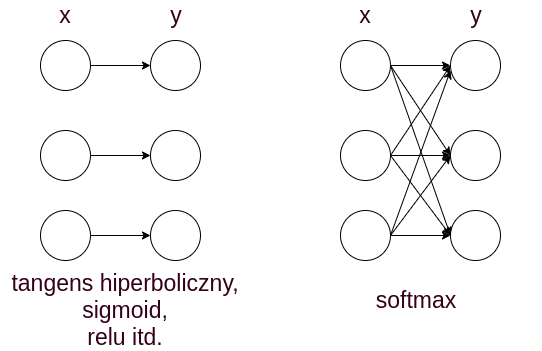

Niemniej powyższy obrazek może być mylący, przypominając warstwę gęstą, podczas gdy Softmax jak wspomniane wyżej funkcje aktywacji nie posiada trenowalnych parametrów. Sama funkcja Softmax wyraża się następująco:

$$y_i = \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}$$

Nie jest sztuką pokazać, że suma elementów $y_i$ wynosi $1$.

$$\sum_{i=1}^n y_i = \sum_{i=1}^n \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}} = \frac{1}{\sum_{j=1}^ne^{x_j}} \sum_{i=1}^n e^{x_i}=1 $$

Nie jest też sztuką napisać metodę `forward` warstwy Softmax (innym tematem jest jej stabilność, do którego później wrócimy):

```python
class Softmax(Layer):
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp/np.sum(tmp)
        return self.output
        
    def backward(self, output_gradient, learning_rate):
        pass
```

Standardowo, zagadnieniem staje się metoda `backward`, która wymaga wyznaczenia $\frac{\partial E}{\partial X}$. Sam `Softmax` za `output_gradient` dostanie $\frac{\partial E}{\partial Y}$, gdzie $E$ to już funkcja kosztu.

Więc przejdźmy do wyznaczenia $\frac{\partial E}{\partial X}$, podobnie jak wcześniej przyglądając się pochodnej po pojedynczym elementowi $x_k$:

$$\frac{\partial E}{\partial x_k} = \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_k}$$

Przyjrzyjmy się $\frac{\partial y_i}{\partial x_k}$, znając wyrażenie na funkcje Softmax, oraz znając wzór na pochodną ilorazu funkcji: 
$$y_i = \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}$$

$$(\frac{u}{v})^{'} = \frac{u^{'}v -uv^{'}}{v^2} $$

Mamy tutaj dwa przypadki:
- gdy $k=i$
- gdy $k\neq i$

Dla $k=i$:

$$\frac{\partial y_i}{\partial x_k} = \frac{\partial y_i}{\partial x_i} = \frac{\partial(\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}})}{\partial x_i}$$

$y_i = f(x_i)$, a więc $\frac{\partial y_i}{\partial x_i}=f^{'}(x_i)$. Zapisując:

$$u(x_i)= e^{x_i}$$

$$v(x_i) = \sum_{j=1}^ne^{x_j}$$

$$f(x_i) = \frac{u(x_i)}{v(x_i)}$$

Możemy skorzystać z reguły na pochodną ilorazu funkcji:

$$ u^{'}(x_i)= e^{x_i} $$

$$ v^{'}(x_i)= e^{x_i} $$

$$ f^{'}(x_i)= \frac{u^{'}(x_i)v(x_i) -u(x_i)v^{'}(x_i)}{v^2(x_i)} = \frac{e^{x_i} \sum_{j=1}^n e^{x_j}-e^{x_i}e^{x_i}}{(\sum_{j=1}^ne^{x_j})^2} = \frac{e^{x_i} \sum_{j=1}^n e^{x_j}}{(\sum_{j=1}^ne^{x_j})^2} - \frac{e^{x_i}e^{x_i}}{(\sum_{j=1}^ne^{x_j})^2} $$

A następnie z wyrażenia na funckje Softmax:

$$ \frac{e^{x_i} \sum_{j=1}^n e^{x_j}}{(\sum_{j=1}^ne^{x_j})^2} - \frac{e^{x_i}e^{x_i}}{(\sum_{j=1}^ne^{x_j})^2} = \frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}} - \frac{e^{2x_i}}{(\sum_{j=1}^ne^{x_j})^2} = y_i-y_i^2 = y_i(1-y_i)  $$





Teraz przyjrzymy się przypadkowi $k \neq i$. 

$$\frac{\partial y_i}{\partial x_k} =  \frac{\partial(\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}})}{\partial x_k} = \frac{\partial(\frac{e^{x_i}}{e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n}})}{\partial x_k} = e^{x_i}\frac{\partial(\frac{1}{e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n}})}{\partial x_k} $$

Teraz korzystając z reguły łańcuchowej $[f(g(x))]^{'} = f^{'}(g(x))g^{'}(x)$, gdzie $g(x) = e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n} $, a $f(g(x)) = \frac{1}{g(x)}$. Wtedy:

$$f^{'}(g(x)) = \frac{\partial \frac{1}{g(x)}}{\partial g(x)} = \frac{-1}{g^2(x)} = \frac{-1}{(e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n})^2} = \frac{-1}{(\sum_{j=1}^ne^{x_j})^2} $$

$$ g^{'}(x) =  \frac{\partial (e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n})}{\partial x_k} = e^{x_k} $$

Podstawiając powyższe pod równanie na $\frac{\partial y_i}{\partial x_k}$ i korzystając z wyrażenia na funkcje Softmax:

$$\frac{\partial y_i}{\partial x_k} = e^{x_i}\frac{\partial(\frac{1}{e^{x_1}+e^{x_2}+\cdots e^{x_k}+\cdots + e^{x_n}})}{\partial x_k} = e^{x_i} \frac{-1}{(\sum_{j=1}^ne^{x_j})^2} e^{x_k} = -\frac{e^{x_i}}{(\sum_{j=1}^ne^{x_j})^2} \frac{e^{x_k}}{(\sum_{j=1}^ne^{x_j})^2} = -y_iy_k$$




Podsumowując:

- gdy $k=i$: $\frac{\partial y_i}{\partial x_k} = y_i(1-y_i)$ 
- gdy $k\neq i$: $\frac{\partial y_i}{\partial x_k} = -y_iy_k$

Możemy wrócić do wyznaczania $\frac{\partial E}{\partial X}$, czyli:

$$ \frac{\partial E}{\partial X} = \begin{pmatrix} \frac{\partial E}{\partial x_1} \\ \frac{\partial E}{\partial x_2} \\ \vdots \\ \frac{\partial E}{\partial x_k} \\ \vdots \\ \frac{\partial E}{\partial x_n} \end{pmatrix} $$

gdzie: $\frac{\partial E}{\partial x_k} = \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_k}$, więc:

$$ \frac{\partial E}{\partial X} = \begin{pmatrix} \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_1} \\ \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_2}  \\ \vdots \\ \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_k} \\ \vdots \\ \sum_{i=1}^n \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_n} \end{pmatrix} = \begin{pmatrix} \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_1} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_1} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_1} \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_2} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_2} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_2}  \\ \vdots \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_k} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_k} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_k} \\ \vdots \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_n} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_n} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_n} \end{pmatrix}$$





Powyższą macierz możemy przedstawić poprzez mnożenie macierzową i podobnie jak wcześniej, dochodząc do relacji między $\frac{\partial E}{\partial X}$ a $\frac{\partial E}{\partial Y}$:

$$\frac{\partial E}{\partial X} = \begin{pmatrix} \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_1} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_1} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_1} \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_2} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_2} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_2}  \\ \vdots \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_k} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_k} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_k} \\ \vdots \\ \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial x_n} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial x_n} + \cdots + \frac{\partial E}{\partial y_n}\frac{\partial y_n}{\partial x_n} \end{pmatrix} = \begin{pmatrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_2}{\partial x_1} & \cdots &  \frac{\partial y_n}{\partial x_1} \\ \frac{\partial y_1}{\partial x_2} & \frac{\partial y_2}{\partial x_2} & \cdots &  \frac{\partial y_n}{\partial x_2} \\ \vdots & \vdots  & \ddots & \vdots  \\ \frac{\partial y_1}{\partial x_n} & \frac{\partial y_2}{\partial x_n} & \cdots &  \frac{\partial y_n}{\partial x_n}    \end{pmatrix} \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_n} \end{pmatrix} $$




Teraz wracając do wyznaczonego dla przypadków $k=i$ oraz $k \neq i$ członu $\frac{\partial y_i}{\partial x_k}$:

$$\frac{\partial E}{\partial X} = \begin{pmatrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_2}{\partial x_1} & \cdots &  \frac{\partial y_n}{\partial x_1} \\ \frac{\partial y_1}{\partial x_2} & \frac{\partial y_2}{\partial x_2} & \cdots &  \frac{\partial y_n}{\partial x_2} \\ \vdots & \vdots  & \ddots & \vdots  \\ \frac{\partial y_1}{\partial x_n} & \frac{\partial y_2}{\partial x_n} & \cdots &  \frac{\partial y_n}{\partial x_n}    \end{pmatrix} \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_n} \end{pmatrix} = \begin{pmatrix}y_1(1-y_1) & -y_1y_2 &  \cdots & -y_1y_n \\ -y_2y_1 & y_2(1-y_2) & \cdots & -y_2y_n \\ \vdots & \vdots & \ddots & \vdots  \\-y_ny_1 & -y_ny_2 & \cdots & y_n(1-y_n)\end{pmatrix} \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_n} \end{pmatrix}$$

Powyższe możemy zapisać z wykorzystaniem produktu Hadamarda:

$$\frac{\partial E}{\partial X} = \begin{bmatrix} \begin{pmatrix}y_1 & y_1 &  \cdots & y_1 \\ y_2 & y_2 & \cdots & y_2 \\ \vdots & \vdots & \ddots & \vdots  \\y_n & y_n & \cdots & y_n\end{pmatrix} \odot \begin{pmatrix}1-y_1 & -y_2 &  \cdots & -y_n \\ -y_1 & 1-y_2 & \cdots & -y_n \\ \vdots & \vdots & \ddots & \vdots  \\-y_1 & -y_2 & \cdots & 1-y_n\end{pmatrix}  \end{bmatrix} \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_n} \end{pmatrix} $$

A następnie skorzystać z odejmowania macierzy:

$$\frac{\partial E}{\partial X} = \begin{bmatrix} \begin{pmatrix}y_1 & y_1 &  \cdots & y_1 \\ y_2 & y_2 & \cdots & y_2 \\ \vdots & \vdots & \ddots & \vdots  \\y_n & y_n & \cdots & y_n\end{pmatrix} \odot \begin{bmatrix} \begin{pmatrix}1 & 0 &  \cdots & 0 \\ 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots  \\0 & 0 & \cdots & 1\end{pmatrix}-\begin{pmatrix}y_1 & y_2 &  \cdots & y_n \\ y_1 & y_2 & \cdots & y_n \\ \vdots & \vdots & \ddots & \vdots  \\y_1 & y_2 & \cdots & y_n\end{pmatrix} \end{bmatrix}  \end{bmatrix} \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_n} \end{pmatrix}$$



Teraz możemy przejść do zwartego zapisu, ułatwiającego implementacje. Podstawiając za $A$ macierz:

$$A=\begin{pmatrix}y_1 & y_1 &  \cdots & y_1 \\ y_2 & y_2 & \cdots & y_2 \\ \vdots & \vdots & \ddots & \vdots  \\y_n & y_n & \cdots & y_n\end{pmatrix}$$

Dochodzimy do eleganckiego równania na $\frac{\partial E}{\partial X}$:

$$\frac{\partial E}{\partial X} = (A \odot(I-A^T))\frac{\partial E}{\partial Y} $$


W tym momencie mamy "przepis na ciastko" i możliwość ukończenia implementacji metody `backward` w klasie `Softmax`.

Niemniej, pozostaje jeszcze jeden temat, jakim jest stabilność numeryczna implementacji funkcji Softmax. W przypadku "normalnych" wartości, wszystko wydaje się zachowywać poprawnie:

In [ ]:
import numpy as np

class Softmax(Layer):
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp/np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        pass

softmax = Softmax(input_size = 3)

In [ ]:
softmax.forward(np.array([2, 1, 1]))

array([0.57611688, 0.21194156, 0.21194156])

Natomiast przy wysokich wartościach uzyskamy wartości `nan`: 

In [ ]:
softmax.forward(np.array([1000, 100, 800]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([nan,  0., nan])

Winowajcą jest `np.exp`, który już dla wartości `710` będzie miał kłopot:

In [ ]:
np.exp(np.array([710, 20]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([           inf, 4.85165195e+08])

Jak widać, pojawia się wartość oznaczająca nieskończoność `inf` (ang. infinity). W tym przypadku, przy dzieleniu przez sumę elementów dochodzimy do matematycznego niezdefiniowanego $\frac{\infty}{\infty}$, a więc w Pythonie `nan`:

In [ ]:
tmp = np.exp(np.array([710, 20]))
tmp/np.sum(tmp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan,  0.])

Czy jest na to recepta? Pewnym pomysłem jest odjęcie wartości maksymalnej od argumentu funkcji Softmax:

In [ ]:
max_value = max(np.array([710, 20]))
max_value

710

In [ ]:
tmp = np.exp(np.array([710, 20])-max_value)
tmp

array([1.00000000e+000, 2.17173828e-300])

In [ ]:
tmp/np.sum(tmp)

array([1.00000000e+000, 2.17173828e-300])

Tym sposobem zapewniamy numeryczną stabilność. Widzimy też, że Softmax "bardzo karze" wartości mniejsze, ale to już jest cecha tej funkcji.

## Pytanie

Pozostaje pytanie, czy matematycznie:

$$\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}} \stackrel{?}{=} \frac{e^{x_i - max(x1, \cdots, x_n)}}{\sum_{j=1}^ne^{x_j- max(x1, \cdots, x_n)}}$$

Jeśli tak to świetnie, a jeśli nie? Czy nie należy dokonać zmiany w implementacji `backward`? Dokonaj stosownego wyprowadzenia.

**Wskazówka:** $e^{a-b}=\frac{e^a}{e^b}$


$$ \frac{e^{x_i - max(x1, \cdots, x_n)}}{\sum_{j=1}^ne^{x_j- max(x1, \cdots, x_n)}} = \cdots $$

# Materiały pomocniczo-uzupełniające

Jeśli Czytelnik/niczka chce pogłębić wiedzę, lub spojrzeć na tematy z innej perspektywy, poniżej zamieszczone są materiały przedmiotu GSN oraz materiały zewnętrzne.

Materiały Pana Prof. Skarbka powiązane tematycznie z lab1:
- [Wbudowane struktury danych w Pythonie](https://colab.research.google.com/drive/1MDX75mtbsqO7Mr2yJjzKBCL5wktNbM1X?usp=sharing)
- [Definicja tensora i przykłady w `NumPy`](https://colab.research.google.com/drive/12Sixg4A0zh1L6_68_Va5ZrmJrgTWzhve?usp=sharing)
- [Przetwarzanie plikowe (csv)](https://colab.research.google.com/drive/1SlYjLUQ_b4-hjkv8a7m1M-Fbkj1eCIqk?usp=sharing)
- [Tensory w reprezentacji obrazu i dźwięku - Przykłady](https://colab.research.google.com/drive/10GPgDUfvUyPVRjL4so284sOs2JszPx7C?usp=sharing)
- [Neuronowe jednostki obliczeniowe](https://colab.research.google.com/drive/1IuLkLiInFX5sOxIT0toMrvOSSULj8FQe?usp=sharing)
- [Matematyka neuronowych sieci głębokich  −  Zarys](https://colab.research.google.com/drive/1a9xm5tx4ey6gNYp66lxJaCpEUwT2j9kn?usp=sharing)
- [Gradienty w technice grafu przepływu - Przykłady](https://colab.research.google.com/drive/1drxhxyhp0H6SKYyOtwaF1tLIst3VS2sF?usp=sharing)


Materiały zewnętrzne:
- [25 nooby Python habits you need to ditch](https://www.youtube.com/watch?v=qUeud6DvOWI)
- [Making Computation Easier with Cool Numpy Tricks - Kirit Thadaka](https://www.youtube.com/watch?v=poD8ud4MxOY)
- [Advanced NumPy | SciPy Japan 2019 Tutorial | Juan Nunuz-Iglesias
](https://www.youtube.com/watch?v=cYugp9IN1-Q)

